In [19]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import math

In [2]:
# load data into a Pandas DataFrame
df = pd.read_csv('heart_disease_dataset.csv') 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Correctly importing the dataset using pandas 'read_csv', ensuring correct import and the data looks uncorrupted.

df.info()

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Checking all of the data features of the dataset there are no unrealistic values. I specifically look at the min and max of the values see if there are any negative values.

In [10]:
# Here i check the distribution of the target variable 'num'
df.num.value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

<Axes: >

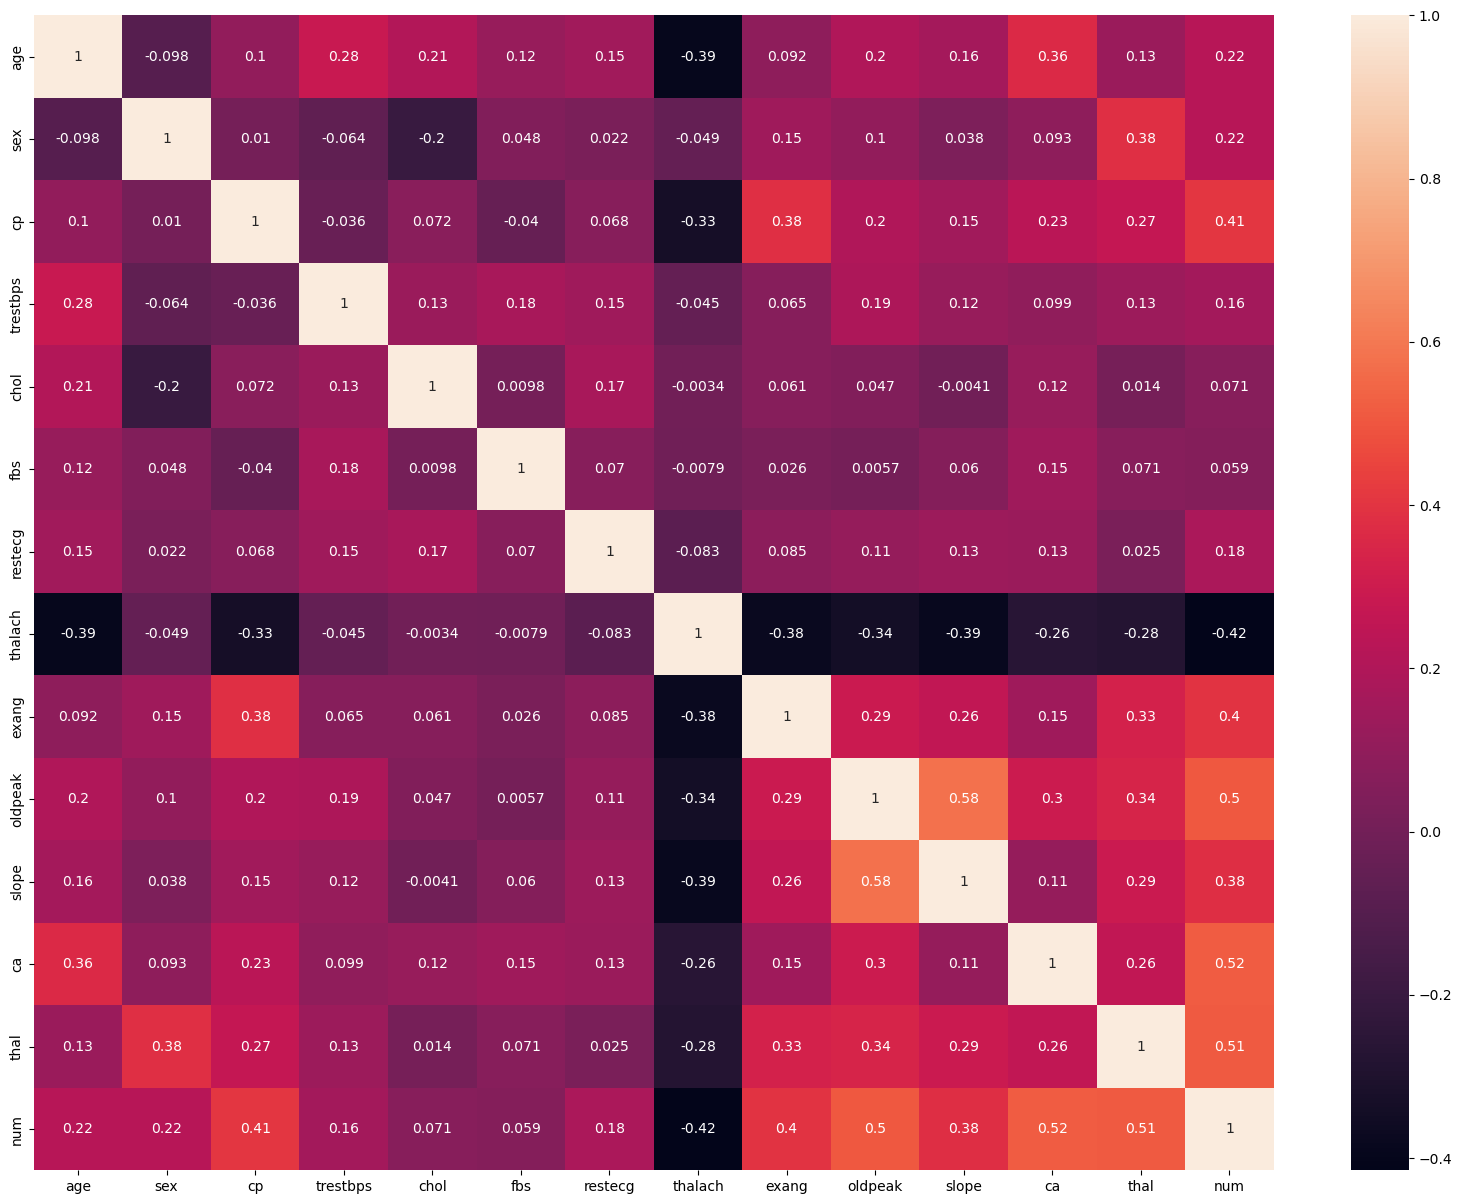

In [12]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

### Heatmap Correlation Analysis
* **Target Variable (`num`):** The strongest positive predictors for heart disease are **`ca`** (0.52), **`thal`** (0.51), and **`oldpeak`** (0.50).
* **Inverse Relationship:** **`thalach`** (Max Heart Rate) has a strong negative correlation (-0.42) with the target, indicating that patients with heart disease often achieve lower max heart rates.
* **Multicollinearity:** **`oldpeak`** and **`slope`** have a notably high correlation (0.58), suggesting they provide overlapping information regarding ST depression.
* **Biological Trend:** **`age`** and **`thalach`** are negatively correlated (-0.39), confirming the natural trend that max heart rate decreases as age increases.

In [21]:
def check_outliers(df):
    # Get all columns (skipping the first one as per your original logic)
    cols_to_plot = df.columns[1:]
    
    # Define grid layout
    n_cols = 3  # You can set this to 2, 3, or 4 depending on preference
    n_rows = math.ceil(len(cols_to_plot) / n_cols)
    
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.set_style('whitegrid')
        # Using x= ensures the boxplot is vertical and suppresses warnings
        sns.boxplot(y=df[col]) 
        plt.title(col)
        plt.tight_layout()

    plt.show()

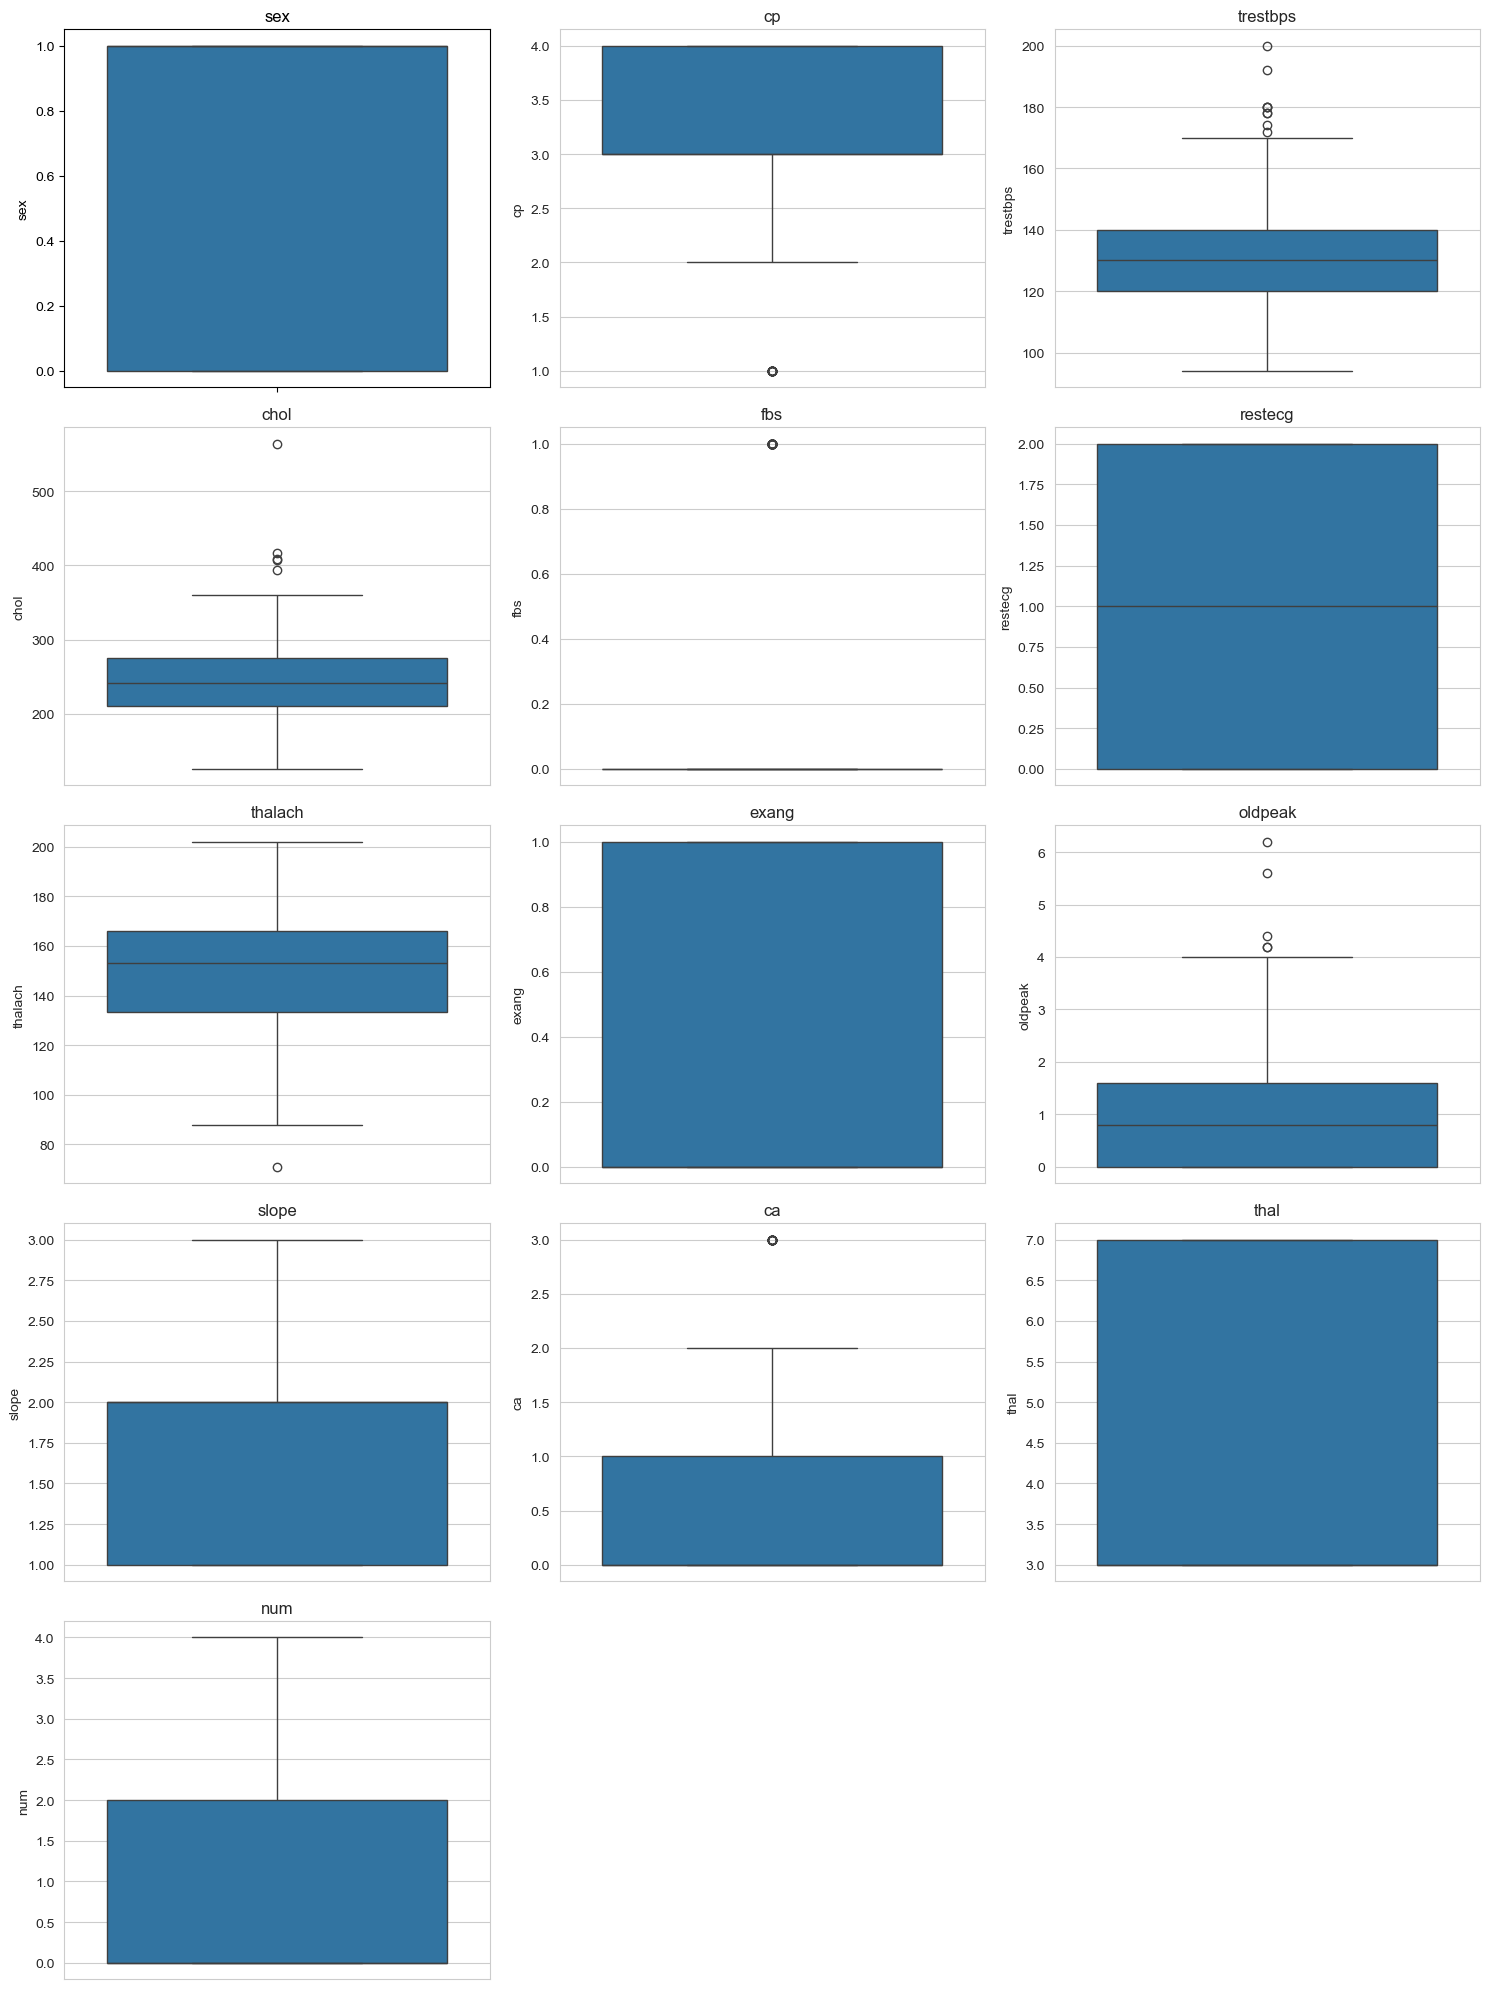

In [23]:
check_outliers(df)

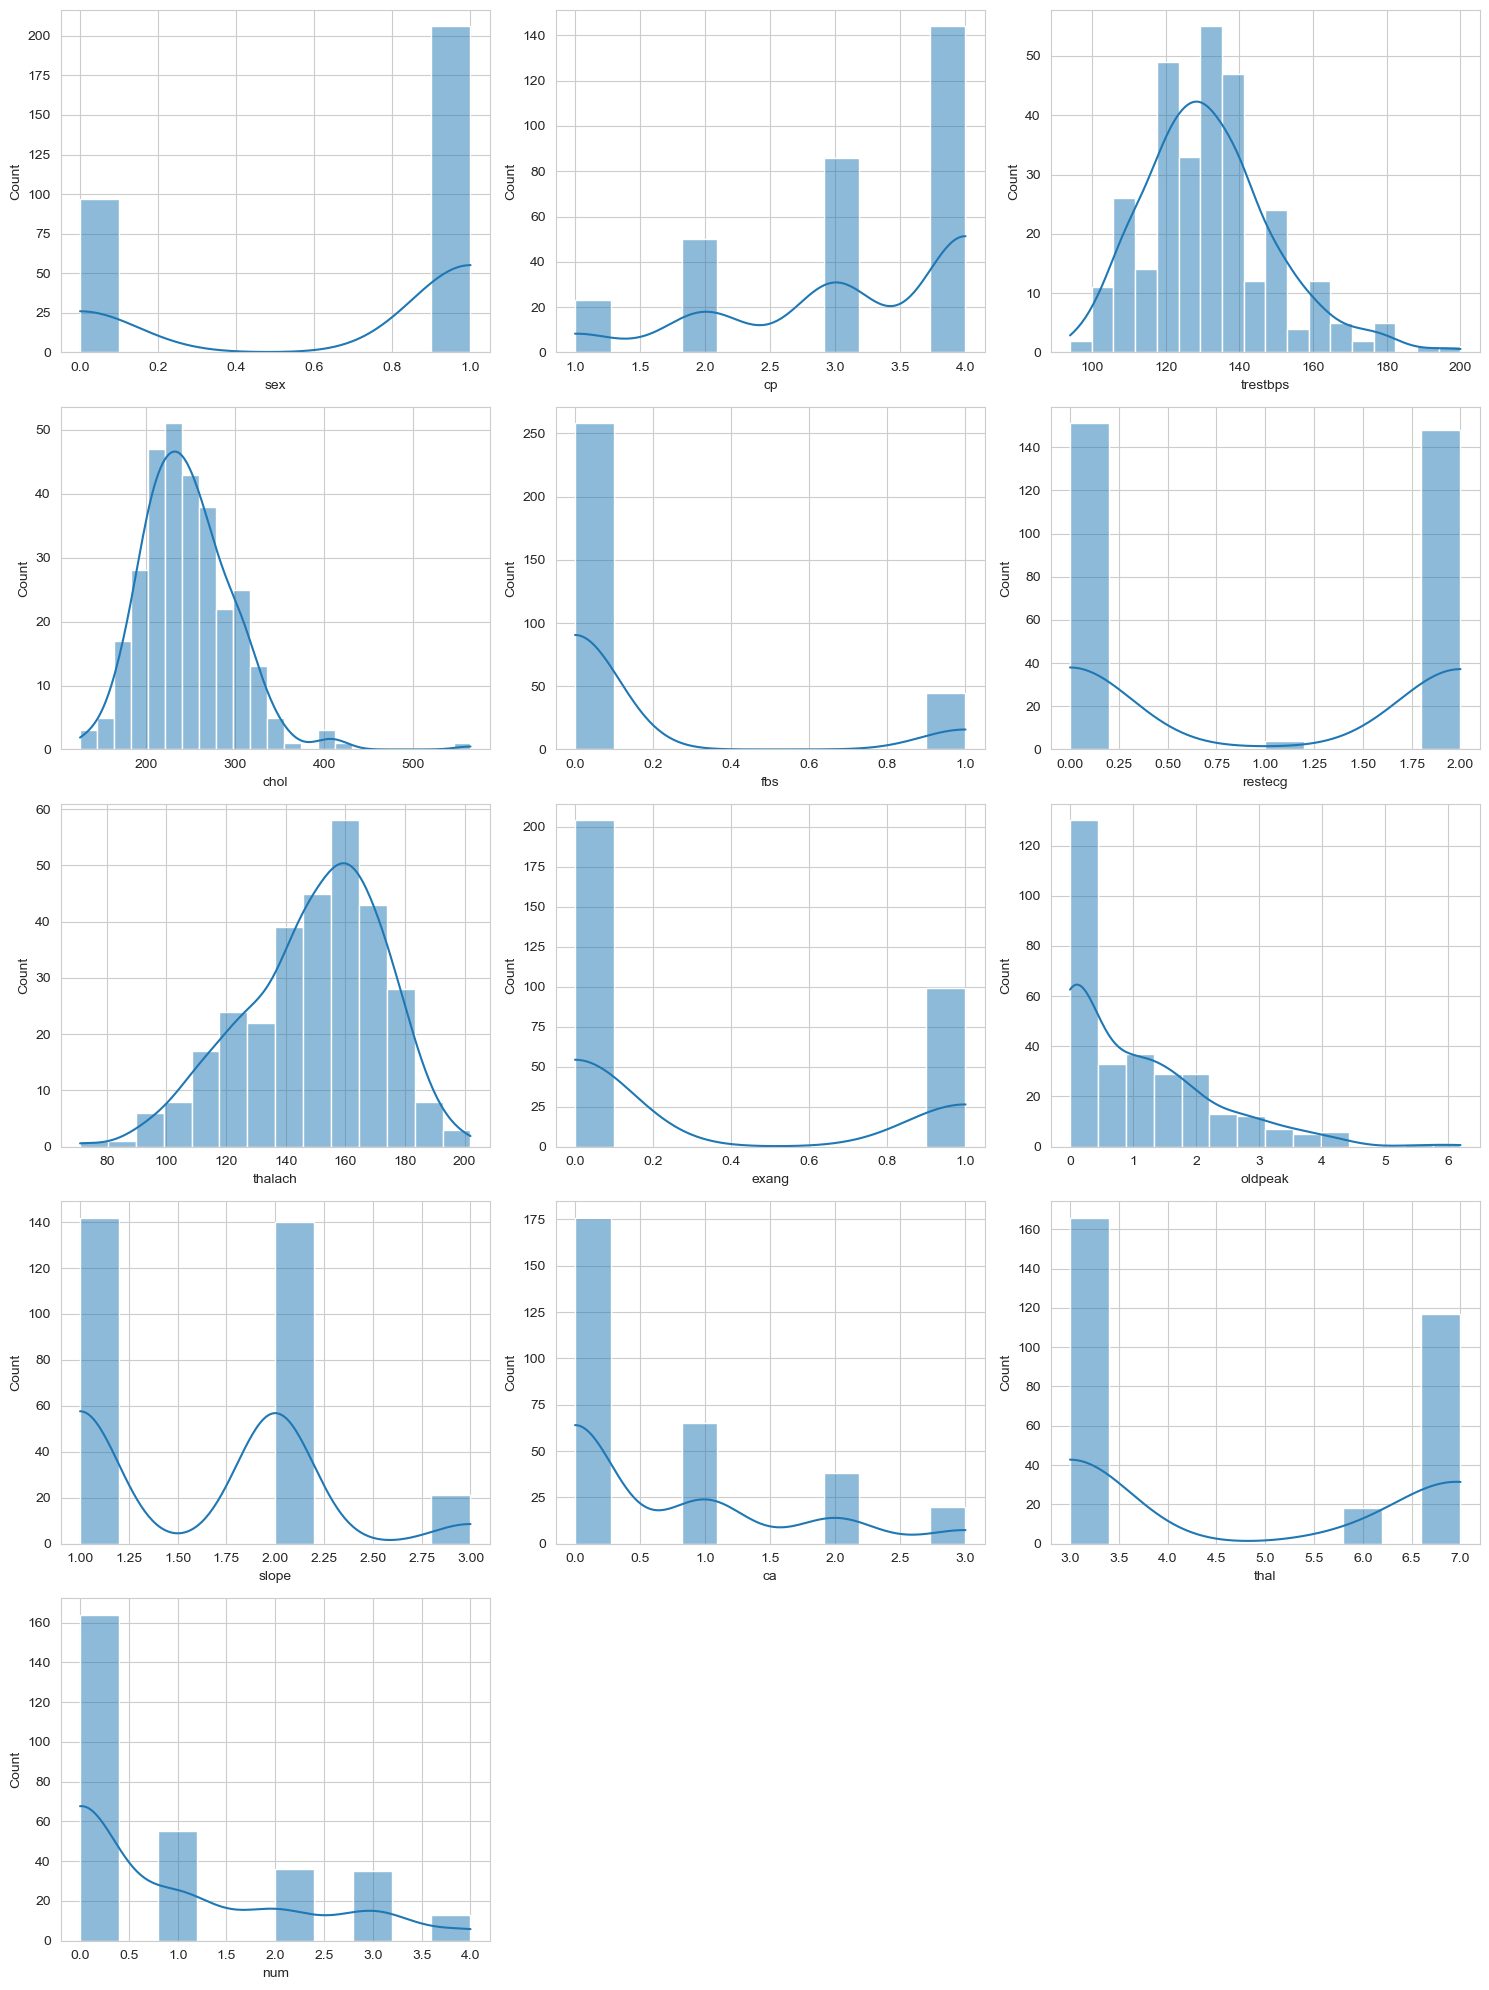

In [25]:
def check_dist(df):
    # 1. Select columns (skipping the first one, as per your original logic)
    # It is safer to specifically select numeric columns to avoid errors
    cols_to_plot = df.columns[1:]
    
    # 2. Set up a dynamic grid
    # Fixed number of columns (3 is usually a good balance)
    n_cols = 3 
    # Calculate rows needed automatically (rounding up)
    n_rows = math.ceil(len(cols_to_plot) / n_cols)
    
    plt.figure(figsize=(5 * n_cols, 4 * n_rows))
    
    for i, col in enumerate(cols_to_plot):
        plt.subplot(n_rows, n_cols, i + 1)
        
        # 3. Use histplot (modern replacement for distplot)
        # kde=True adds the curve you want
        sns.histplot(df[col], kde=True) 
        
        plt.tight_layout()
        
    plt.show()

check_dist(df)